# Visualising Carbon results

This notebook will contain code for visualsing the CSV files containing CO2 emssion information from the previous 4 assignments.

The out folder contains 2 kinds of files
- Files containing an overall estimate for the whole assignment (starting with emissions_assignment_)
    - OBS: note that since assignment 2 contains 3 seperate scripts, 3 csv for that assignment is created
- Files containing subtask-specific CO2 emission estimates (starting with emissions_base_)
    - OBS: note again that assignment 2 will have 3 of such files

To compare and visualise the results, both from an overall assignment-emission perspective and from a task-specific perspective, 2 csv files are created by merging the 2 different types of files. 

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 35.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 44.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 12.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 7.7 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 23.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Merging over-all CO2 emission csv files 
csv_files = [f for f in os.listdir("../out/") if f.startswith('emissions_assignment')]
dfs = []
for csv in csv_files:
    df = pd.read_csv(os.path.join("../out", csv))
    dfs.append(df)
general_df = pd.concat(dfs, ignore_index=True).sort_values(by='project_name')
# Streamlining the names of the project_name column
general_df['project_name'] = general_df['project_name'].str[:12]
# Make a new column 'total_emissions' that summarise based on assignment 
general_df['total_emissions'] = general_df.groupby('project_name')['emissions'].transform('sum')


# Merging task-base CO2 emission csv files
csv_files = [f for f in os.listdir("../out/") if f.startswith('emissions_base')]
dfs = []
for csv in csv_files:
    df = pd.read_csv(os.path.join("../out", csv))
    dfs.append(df)
task_specific_df = pd.concat(dfs, ignore_index=True).sort_values(by='project_name')
# Streamlining the names of the project_name column
task_specific_df['project_name'] = task_specific_df['project_name'].str[:12]

## Plotting the results

Two different plots are created for visualisation: one displaying the emissions of all tasks colored by assignment, and one displaying the total emission per assignment

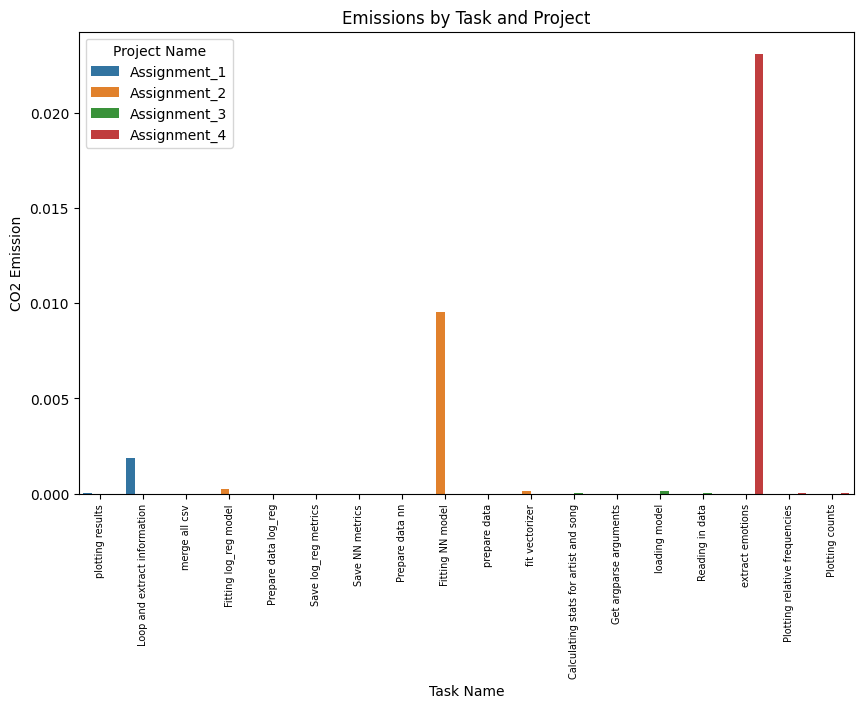

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='task_name', y='emissions', hue='project_name', data=task_specific_df)
plt.title('Emissions by Task and Project')
plt.xlabel('Task Name')
plt.ylabel('CO2 Emission')
plt.legend(title='Project Name')
plt.xticks(rotation=90, fontsize=7)
plt.show()
plt.savefig("../out/Emissions_by_task.png")

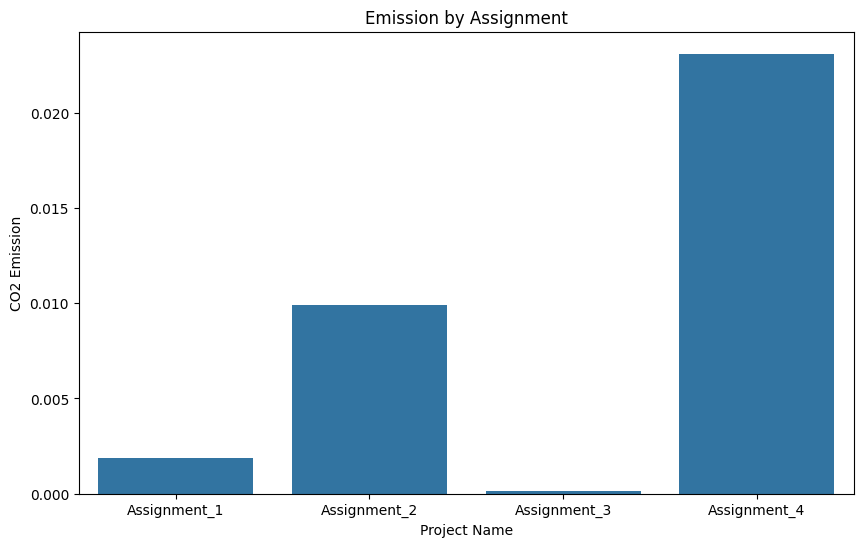

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='project_name', y='total_emissions', data=general_df)
plt.title('Emission by Assignment')
plt.ylabel('CO2 Emission')
plt.xlabel('Project Name')
plt.show()
plt.savefig("../out/Emissions_by_assignment.png")